In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

In [2]:
data = pd.read_csv('balanced_dataset.csv')
X = data.drop('Stroke', axis=1)
y = data['Stroke']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_resampled)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y_resampled, test_size=0.2, random_state=42)

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM (Linear)': SVC(kernel='linear'),
    'SVM (RBF)': SVC(kernel='rbf'),
    'KNN': KNeighborsClassifier()
}

In [3]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1

In [4]:
results = {}
for name, model in models.items():
    accuracy, precision, recall, f1 = evaluate_model(model, X_train, y_train, X_test, y_test)
    results[name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}
    display(pd.DataFrame(results).T)

results_df = pd.DataFrame(results).T
print(results_df)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30]
}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_

cv_scores = cross_val_score(best_rf, X_pca, y_resampled, cv=5, scoring='accuracy')
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean cross-validation score: {cv_scores.mean()}')

,Accuracy,F1 Score,Precision,Recall
Logistic Regression,0.71367,0.723338,0.698786,0.749678


,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.713670,0.698786,0.749678,0.723338
Decision Tree,0.819282,0.801095,0.848801,0.824258


,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.713670,0.698786,0.749678,0.723338
Decision Tree,0.819282,0.801095,0.848801,0.824258
Random Forest,0.909062,0.879168,0.948183,0.912372


,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.713670,0.698786,0.749678,0.723338
Decision Tree,0.819282,0.801095,0.848801,0.824258
Random Forest,0.909062,0.879168,0.948183,0.912372
SVM (Linear),0.715665,0.687556,0.789121,0.734846


,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.713670,0.698786,0.749678,0.723338
Decision Tree,0.819282,0.801095,0.848801,0.824258
Random Forest,0.909062,0.879168,0.948183,0.912372
SVM (Linear),0.715665,0.687556,0.789121,0.734846
SVM (RBF),0.718818,0.685862,0.806007,0.741096


,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.713670,0.698786,0.749678,0.723338
Decision Tree,0.819282,0.801095,0.848801,0.824258
Random Forest,0.909062,0.879168,0.948183,0.912372
SVM (Linear),0.715665,0.687556,0.789121,0.734846
SVM (RBF),0.718818,0.685862,0.806007,0.741096
KNN,0.850174,0.772755,0.991493,0.868564


                     Accuracy  Precision    Recall  F1 Score
Logistic Regression  0.713670   0.698786  0.749678  0.723338
Decision Tree        0.819282   0.801095  0.848801  0.824258
Random Forest        0.909062   0.879168  0.948183  0.912372
SVM (Linear)         0.715665   0.687556  0.789121  0.734846
SVM (RBF)            0.718818   0.685862  0.806007  0.741096
KNN                  0.850174   0.772755  0.991493  0.868564
Cross-validation scores: [0.93995366 0.95604042 0.92617622 0.8201712  0.81753234]
Mean cross-validation score: 0.8919747705005859


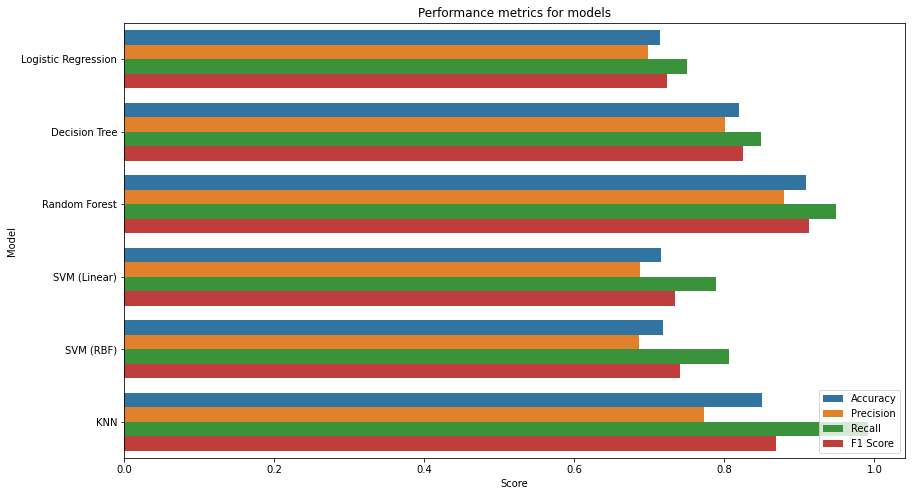

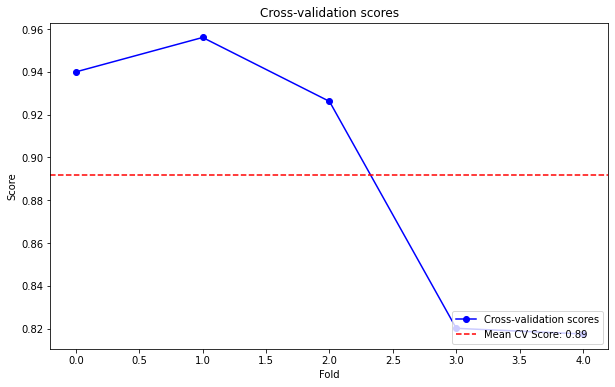

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Performance metrics data
data = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM (Linear)', 'SVM (RBF)', 'KNN'],
    'Accuracy': [0.713670, 0.819282, 0.909062, 0.715665, 0.718818, 0.850174],
    'Precision': [0.698786, 0.801095, 0.879168, 0.687556, 0.685862, 0.772755],
    'Recall': [0.749678, 0.848801, 0.948183, 0.789121, 0.806007, 0.991493],
    'F1 Score': [0.723338, 0.824258, 0.912372, 0.734846, 0.741096, 0.868564]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Melt the DataFrame for seaborn
df_melted = df.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Bar chart for performance metrics
plt.figure(figsize=(14, 8))
sns.barplot(x='Score', y='Model', hue='Metric', data=df_melted)
plt.title('Performance metrics for models')
plt.xlabel('Score')
plt.ylabel('Model')
plt.legend(loc='lower right')
plt.show()

# Cross-validation scores data
cv_scores = [0.93995366, 0.95604042, 0.92617622, 0.8201712, 0.81753234]
mean_cv_score = 0.8919747705005859

# Line plot for cross-validation scores
plt.figure(figsize=(10, 6))
plt.plot(cv_scores, marker='o', linestyle='-', color='b', label='Cross-validation scores')
plt.axhline(y=mean_cv_score, color='r', linestyle='--', label=f'Mean CV Score: {mean_cv_score:.2f}')
plt.title('Cross-validation scores')
plt.xlabel('Fold')
plt.ylabel('Score')
plt.legend(loc='lower right')
plt.show()

In [7]:
best_rf

RandomForestClassifier(n_estimators=200)